# Importing the Required Libraries

In [15]:
import graphlab as gl
from math import floor
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Loading and Exploring the Data

In [2]:
heart=gl.SFrame("heart1.csv")

Finished parsing file /home/guru_2804/Desktop/Heart Disease Prediction/heart1.csv

Parsing completed. Parsed 100 lines in 3.2086 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[float,str,str,float,float,str,str,float,str,float,str,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 504273 lines. Lines per second: 166565

Finished parsing file /home/guru_2804/Desktop/Heart Disease Prediction/heart1.csv

Parsing completed. Parsed 1000000 lines in 3.86535 secs.

In [3]:
heart.head()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
53.63352,male,typ_angina,150.488216,274.020477,f,left_vent_hyper,94.339528,no,1.440151
55.83543,male,non_anginal,129.166976,192.775334,t,left_vent_hyper,148.979664,no,1.929202
44.684172,female,asympt,179.551313,200.892375,f,left_vent_hyper,135.550951,yes,1.873468
64.986164,male,asympt,137.963867,351.187556,f,normal,102.496924,yes,3.38148
69.541123,male,atyp_angina,115.257878,270.263617,f,normal,112.400592,no,0.0
61.169114,male,non_anginal,141.429863,236.361026,f,normal,97.145113,no,4.370753
60.159112,male,asympt,121.252761,262.148887,f,left_vent_hyper,145.490978,yes,3.712546
67.124079,female,atyp_angina,112.999493,174.301934,f,left_vent_hyper,157.888987,no,0.0
57.792209,female,typ_angina,125.371383,275.850822,f,normal,184.815525,yes,0.346362
50.393335,male,asympt,122.214954,250.305515,f,left_vent_hyper,118.119933,yes,0.180811


In [4]:
print("The Size of The Dataset {}".format(len(heart)))

The Size of The Dataset 1000000


# Data Preprocessing

Our Dataset has 13 input features and 1 output . As the type of the input features are not suitable for parsing in this module we will be converting them into numerics.

In [5]:
def age_modifier(x):
    return floor(x) 


def sex_modifier(x):
    if(x=="male"):
        return 1
    else:
        return 0
    
    
def cp_modifier(x):
    if(x=="typ_angina"):
        return 1
    elif(x=="atyp_angina"):
        return 2
    elif(x=="non_anginal"):
        return 3
    else:
        return 4
    
def fbs_modifier(x):
    if(x=='t'):
        return 1
    else:
        return 0
    
def restecg_modifier(x):
    if(x=="st_t_wave_abnormality"):
        return 1
    elif(x=="left_vent_hyper"):
        return 2
    else:
        return 0
    
def exang_modifier(x):
    if(x=="yes"):
        return 1
    else:
        return 0
    
def slope_modifier(x):
    if(x=="flat"):
        return 2
    elif(x=="up"):
        return 1
    else:
        return 3
    
def thal_modifier(x):
    if(x=="normal"):
        return 3
    elif(x=="fixed_defect"):
        return 6
    else:
        return 7
    
def num_modifier(x):
    if(x=='<50'):
        return 0
    else:
        return 1
    
    

In [6]:
heart['age']=heart['age'].apply(age_modifier)
heart['sex']=heart['sex'].apply(sex_modifier)
heart['cp']=heart['cp'].apply(cp_modifier)
heart['fbs']=heart['fbs'].apply(fbs_modifier)
heart['restecg']=heart['restecg'].apply(restecg_modifier)
heart['exang']=heart['exang'].apply(exang_modifier)
heart['slope']=heart['slope'].apply(slope_modifier)
heart['thal']=heart['thal'].apply(thal_modifier)
heart['num']=heart['num'].apply(num_modifier)


# Exploration of Data after Preprocessing

In [9]:
heart.head()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
53.0,1,1,150.488216,274.020477,0,2,94.339528,0,1.440151,1,1,7,1
55.0,1,3,129.166976,192.775334,1,2,148.979664,0,1.929202,1,0,3,0
44.0,0,4,179.551313,200.892375,0,2,135.550951,1,1.873468,2,0,3,1
64.0,1,4,137.963867,351.187556,0,0,102.496924,1,3.38148,2,0,7,1
69.0,1,2,115.257878,270.263617,0,0,112.400592,0,0.0,1,1,3,0
61.0,1,3,141.429863,236.361026,0,0,97.145113,0,4.370753,3,0,7,1
60.0,1,4,121.252761,262.148887,0,2,145.490978,1,3.712546,2,0,7,1
67.0,0,2,112.999493,174.301934,0,2,157.888987,0,0.0,1,1,3,0
57.0,0,1,125.371383,275.850822,0,0,184.815525,1,0.346362,1,2,7,1
50.0,1,4,122.214954,250.305515,0,2,118.119933,1,0.180811,2,3,7,1


# Analysing Features Of The Dataset

In [21]:
gl.canvas.set_target('ipynb') # Setting Up Visualization in Jupyter Notebook

# 1. Num ( The Target )

In [14]:
heart['num'].show()

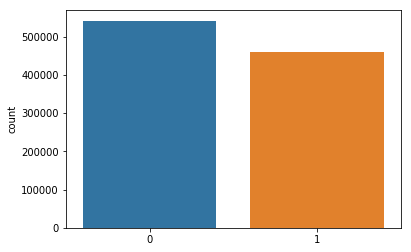

In [35]:
data=list(heart["num"])
sns.countplot(data)

In [36]:
def count(x):
    m=0
    n=0
    for i in x:
        if(i==1):
            m=m+1
        if(i==0):
            n=n+1
  
    return (m,n)

In [37]:
target_count=count(target)
positive=((float)(target_count[0])/(float)(len(heart)))*100
negative=((float)(target_count[1])/(float)(len(heart)))*100

In [38]:
print("Percentage of People Affected by Heart Disease:{}%".format(positive))
print("Percentage of People Not Affected by Heart Disease:{}%".format(negative))



Percentage of People Affected by Heart Disease:45.8564%
Percentage of People Not Affected by Heart Disease:54.1436%


# 2. Sex

In [40]:
heart["sex"].show()

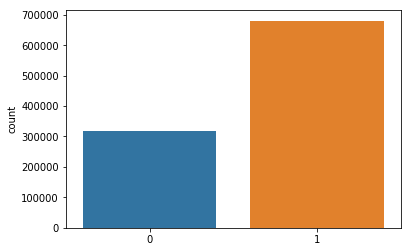

In [41]:
sns.countplot(list(heart["sex"]))

# Splitting the Dataset Into Training and Testing

The dataset is divided into 90% training and 10% testing

In [42]:
train,test=heart.random_split(0.9,seed=0)

In [43]:
train.head()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
53.0,1,1,150.488216,274.020477,0,2,94.339528,0,1.440151,1,1,7,1
55.0,1,3,129.166976,192.775334,1,2,148.979664,0,1.929202,1,0,3,0
44.0,0,4,179.551313,200.892375,0,2,135.550951,1,1.873468,2,0,3,1
64.0,1,4,137.963867,351.187556,0,0,102.496924,1,3.38148,2,0,7,1
69.0,1,2,115.257878,270.263617,0,0,112.400592,0,0.0,1,1,3,0
61.0,1,3,141.429863,236.361026,0,0,97.145113,0,4.370753,3,0,7,1
60.0,1,4,121.252761,262.148887,0,2,145.490978,1,3.712546,2,0,7,1
67.0,0,2,112.999493,174.301934,0,2,157.888987,0,0.0,1,1,3,0
57.0,0,1,125.371383,275.850822,0,0,184.815525,1,0.346362,1,2,7,1
50.0,1,4,122.214954,250.305515,0,2,118.119933,1,0.180811,2,3,7,1


In [44]:
test.head()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
40.0,1,3,124.757402,186.246056,0,0,163.720491,0,1.048416,1,1,7,0
54.0,1,4,128.484312,304.824189,1,2,160.411928,1,1.766737,2,2,6,1
39.0,0,4,165.622482,244.518435,0,0,143.769927,0,1.206481,2,0,7,1
58.0,1,4,115.126803,266.826165,0,2,137.216867,0,0.0,1,0,7,1
58.0,1,4,126.726059,206.079609,0,2,176.381178,1,2.19469,1,2,6,1
49.0,0,3,168.610901,323.946985,0,0,154.932383,1,0.0,1,0,3,0
40.0,1,4,129.604782,263.188677,0,0,179.289328,0,0.0,1,0,3,0
47.0,0,3,129.410284,379.469358,0,2,136.606206,1,1.790159,2,3,3,1
55.0,0,1,152.00626,274.778226,0,0,160.212994,0,0.0,1,3,3,0
64.0,0,4,139.023784,276.709759,0,2,185.393595,1,0.0,1,0,6,1


In [46]:
print("The Length of Training Dataset:{}".format(len(train)))
print("The Length of Testing Dataset:{}".format(len(test)))



The Length of Training Dataset:900134
The Length of Testing Dataset:99866


# Modelling the Data

# Logistic Regression Model

In [60]:
logistic_regression=gl.logistic_classifier.create(train,target='num',features=['age','sex','cp','trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal'])


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 854976

Number of classes           : 2

Number of feature columns   : 13

Number of unpacked features : 13

Number of coefficients    : 14

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 1.940624     | 0.872193          | 0.870765            |

| 2         | 3        | 3.314368     | 0.873219          | 0.872094            |

| 3         | 4        | 4.645652     | 0.873316          | 0.872138            |

| 4         | 5        | 5.985748     | 0.873311          | 0.871761            |

| 5         | 6        | 7.317116     | 0.873313          | 0.871784            |

| 6         | 7        | 8.667828     | 0.873312          | 0.871784            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [57]:
logistic_regression_evaluation=logistic_regression.evaluate(test)

# SVM Model

In [61]:
svm=gl.svm_classifier.create(train,target='num',features=['age','sex','cp','trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



SVM:

--------------------------------------------------------

Number of examples          : 855382

Number of classes           : 2

Number of feature columns   : 13

Number of unpacked features : 13

Number of coefficients    : 14

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000001  | 1.171087     | 0.695799          | 0.692014            |

| 2         | 5        | 1.000000  | 2.303003     | 0.806827          | 0.807025            |

| 3         | 6        | 1.000000  | 3.088040     | 0.806191          | 0.806757            |

| 4         | 7        | 1.000000  | 4.004699     | 0.812105          | 0.812567            |

| 5         | 8        | 1.000000  | 4.789680     | 0.816923          | 0.817528            |

| 6         | 9        | 1.000000  | 5.559510     | 0.821778          | 0.822868            |

| 10        | 13       | 1.000000  | 8.596154     | 0.857314          | 0.859269            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [62]:
svm_evaluation=svm.evaluate(test)

# Random Forest Model

In [63]:
random_forest=gl.random_forest_classifier.create(train,target='num',features=['age','sex','cp','trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 855394

Number of classes           : 2

Number of feature columns   : 13

Number of unpacked features : 13

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.069587     | 0.877573          | 0.876084            | 0.337566          | 0.340134            |

| 2         | 1.866660     | 0.875651          | 0.873380            | 0.348421          | 0.350640            |

| 3         | 2.720164     | 0.881356          | 0.878878            | 0.340764          | 0.343579            |

| 4         | 3.478710     | 0.881760          | 0.878833            | 0.338662          | 0.341531            |

| 5         | 4.390177     | 0.882966          | 0.880755            | 0.338132          | 0.341326            |

| 6         | 5.405284     | 0.883576          | 0.881001            | 0.339930          | 0.343147            |

| 10        | 8.958519     | 0.887163          | 0.884734            | 0.340206          | 0.343173            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [64]:
random_forest_evaluation=random_forest.evaluate(test)

# Decision Tree Model

In [65]:
decision_tree=gl.decision_tree_classifier.create(train,target='num',features=['age','sex','cp','trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Decision tree classifier:

--------------------------------------------------------

Number of examples          : 855184

Number of classes           : 2

Number of feature columns   : 13

Number of unpacked features : 13

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.018202     | 0.878335          | 0.876196            | 0.528833          | 0.529785            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [66]:
decision_tree_evaluation=decision_tree.evaluate(test)

# Boosted Tree Model

In [67]:
boosted_tree=gl.boosted_trees_classifier.create(train,target='num',features=['age','sex','cp','trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 855073

Number of classes           : 2

Number of feature columns   : 13

Number of unpacked features : 13

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.930787     | 0.878226          | 0.877300            | 0.528870          | 0.529341            |

| 2         | 1.847130     | 0.883479          | 0.883247            | 0.438385          | 0.439122            |

| 3         | 2.886004     | 0.884637          | 0.884423            | 0.382368          | 0.383542            |

| 4         | 3.850960     | 0.887764          | 0.886421            | 0.345215          | 0.346366            |

| 5         | 4.808421     | 0.889885          | 0.888795            | 0.319821          | 0.321334            |

| 6         | 5.733274     | 0.891589          | 0.890659            | 0.301289          | 0.303036            |

| 10        | 9.988964     | 0.897144          | 0.894676            | 0.263436          | 0.265272            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [68]:
boosted_tree_evaluation=boosted_tree.evaluate(test)

# Comparison of Different Models

In [75]:
print("Accuracy of Logistic Regression Model:{}".format(logistic_regression_evaluation["accuracy"]*100))
print("Accuracy of SVM Model:{}".format(svm_evaluation["accuracy"]*100))
print("Accuracy of Random Forest Model:{}".format(random_forest_evaluation["accuracy"]*100))
print("Accuracy of Decision Tree Model:{}".format(decision_tree_evaluation["accuracy"]*100))
print("Accuracy of Boosted Tree Model:{}".format(boosted_tree_evaluation["accuracy"]*100))

Accuracy of Logistic Regression Model:87.4321590932
Accuracy of SVM Model:85.8260068492
Accuracy of Random Forest Model:88.6998578095
Accuracy of Decision Tree Model:87.8166743436
Accuracy of Boosted Tree Model:89.6861794805
